**Dataset Name**:Water Potability Dataset

**Selected UNSDG**:United Nations Sustainable Development Goal (SDG) 6: Clean Water and Sanitation

**(a) When and by whom the dataset was created ?**

The Water Potability Dataset was compiled and published by contributors on the Kaggle platform. It is based on publicly available water quality measurements collected from different water sources. The dataset was created to support research and experimentation in water quality analysis and machine learning–based classification.

**(b) How and from where the dataset was accessed ?**

The dataset was accessed from Kaggle, an open data platform widely used for data science research. It was downloaded in CSV format and imported into Python using the Pandas library for analysis and model development.

**(c) Justification of alignment with the selected UNSDG .**

This dataset aligns with SDG 6: Clean Water and Sanitation, which focuses on ensuring the availability of safe and clean drinking water. By classifying water samples as potable or non-potable using physicochemical indicators, this project contributes to water quality monitoring and supports decision-making related to public health and safe water access.

**(d) List and brief description of all attributes (features).**

| Attribute       | Description                                    |
| --------------- | ---------------------------------------------- |
| pH              | Indicates the acidity or alkalinity of water   |
| Hardness        | Concentration of calcium and magnesium salts   |
| Solids          | Total dissolved solids present in water        |
| Chloramines     | Amount of chloramines used for disinfection    |
| Sulfate         | Sulfate concentration in water                 |
| Conductivity    | Electrical conductivity of water               |
| Organic_carbon  | Measure of organic carbon content              |
| Trihalomethanes | Concentration of trihalomethanes               |
| Turbidity       | Measure of water clarity                       |
| Potability      | Target variable (1 = potable, 0 = non-potable) |


**Meaningful Questions**



1.  Can physicochemical water quality indicators be used to accurately classify drinking water as potable or non-potable?

2.   Which water quality features have the strongest influence on water potability?
3.   How does class imbalance affect the performance of classification models?









**Dataset Quality Assessment**

 *   Missing Values: Some attributes such as pH, Sulfate, and Trihalomethanes contain missing values and require preprocessing.

*   Class Imbalance: The dataset contains more non-potable water samples than potable ones.

*   Relevance: All attributes are directly related to water quality assessment.

*   Noise: Minor outliers are present but represent realistic chemical variations rather than data errors.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# load the dataset
import pandas as pd

df = pd.read_csv("/content/water_potability.csv")
df.head()



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# Dataset shape
df.shape


(3276, 10)

In [5]:
# Check missing values
df.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [6]:
df_clean = df.copy()
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

df_clean.isnull().sum()


,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [7]:
# Check the distribution of the target variable (Potability)
df_clean['Potability'].value_counts()



,count
Potability,
0,1998
1,1278


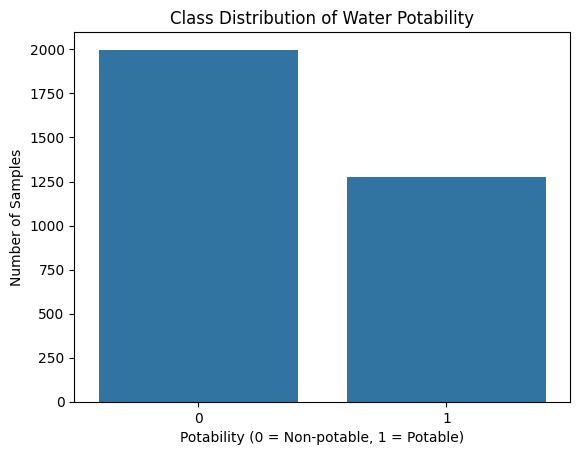

In [8]:
# Visualize class imbalance using a count plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Potability', data=df_clean)
plt.title("Class Distribution of Water Potability")
plt.xlabel("Potability (0 = Non-potable, 1 = Potable)")
plt.ylabel("Number of Samples")
plt.show()



In [9]:
# Summary statistics
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


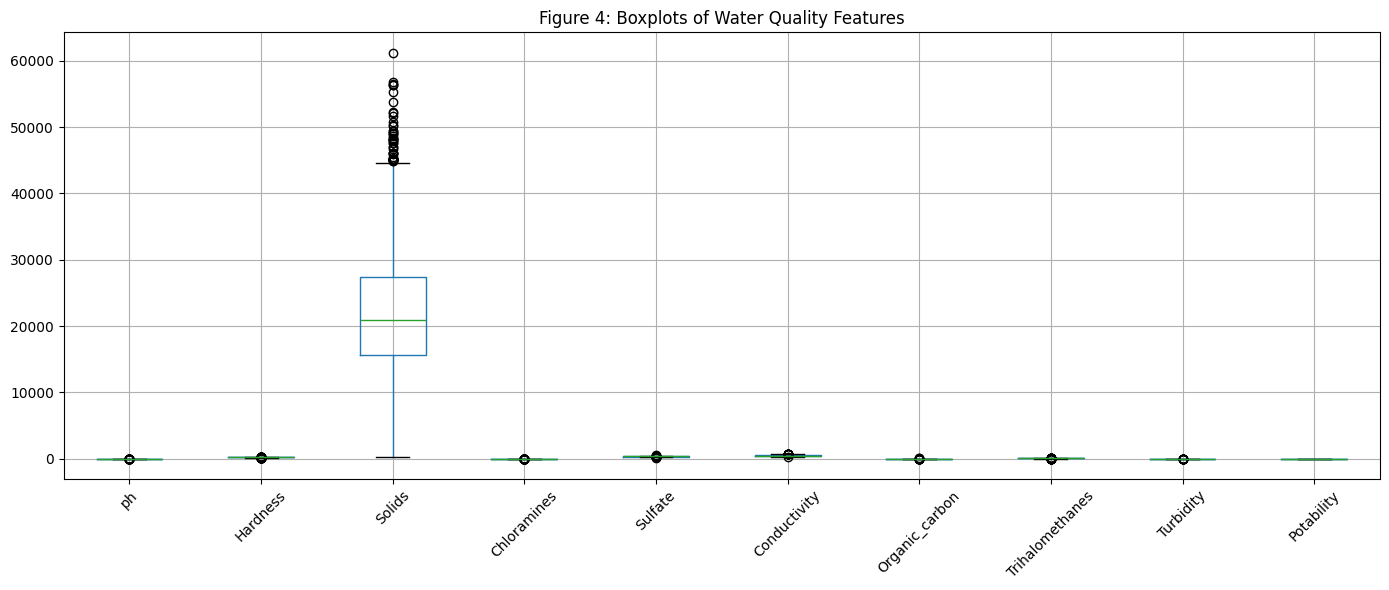

In [10]:
plt.figure(figsize=(14, 6))
df.boxplot(rot=45)
plt.title("Figure 4: Boxplots of Water Quality Features")
plt.tight_layout()
plt.show()


The boxplot shows the distribution of pH values and highlights the presence of a few outliers. These outliers represent realistic variations in water acidity rather than measurement errors.

##2. Exploratory Data Analysis (EDA)

In [11]:
df.isnull().sum()


,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [12]:
df_clean = df.copy()
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

df_clean.isnull().sum()



,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


In [13]:
df_clean.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.074194,196.369496,22014.092526,7.122277,333.608364,426.205111,14.284970,66.407478,3.966786,0.390110
std,1.470040,32.879761,8768.570828,1.583085,36.143851,80.824064,3.308162,15.769958,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Missing values were handled using mean imputation to retain all samples in the dataset. Summary statistics were computed to understand the central tendency, spread, and range of each feature. Differences in feature scales indicate the need for normalization before model training.

##Visualizations to Explore the Data

1. Target Variable Distribution (Class Imbalance)


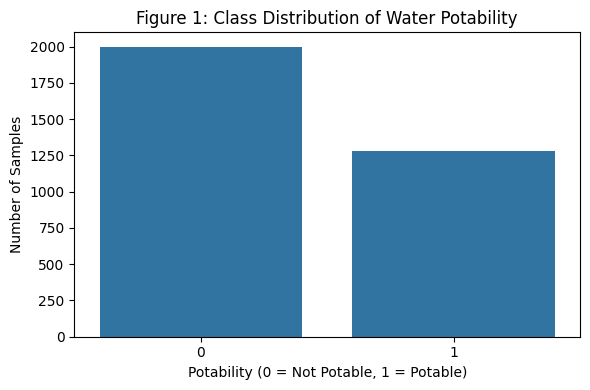

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df)
plt.title("Figure 1: Class Distribution of Water Potability")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Number of Samples")
plt.tight_layout()
plt.show()


The plot shows an imbalance between potable and non-potable water samples, with non-potable samples being more frequent. This imbalance may affect classification performance and should be considered during evaluation.

2. Feature Distribution (Histogram)

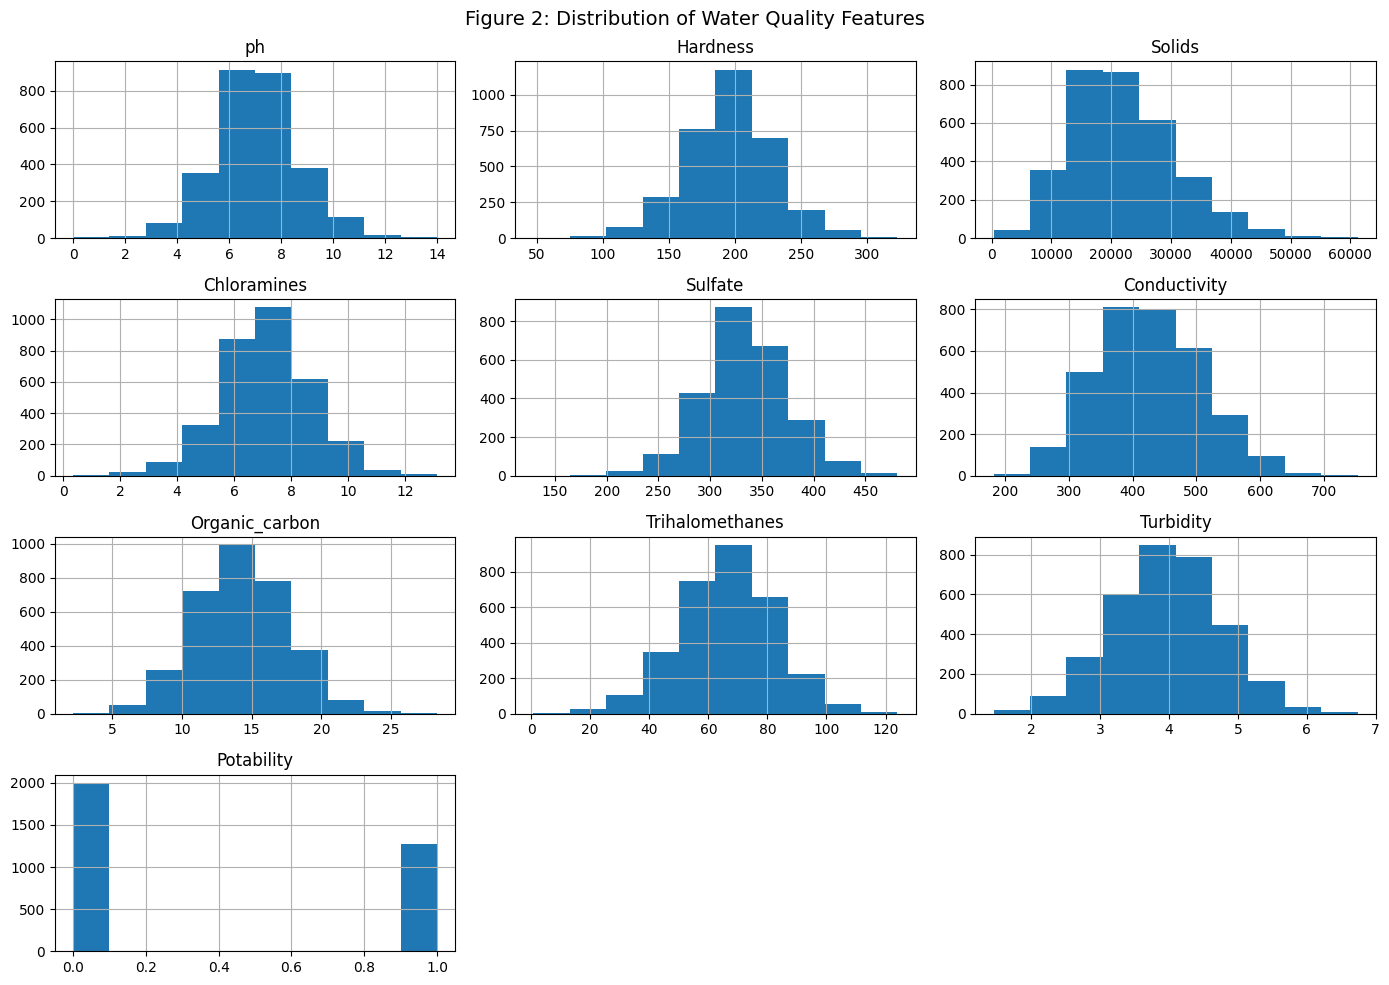

In [15]:
import matplotlib.pyplot as plt

df.hist(figsize=(14, 10))
plt.suptitle("Figure 2: Distribution of Water Quality Features", fontsize=14)
plt.tight_layout()
plt.show()


The histogram shows variability in pH levels across water samples. The distribution indicates that water acidity varies significantly, which may influence potability classification.

3. Correlation Analysis

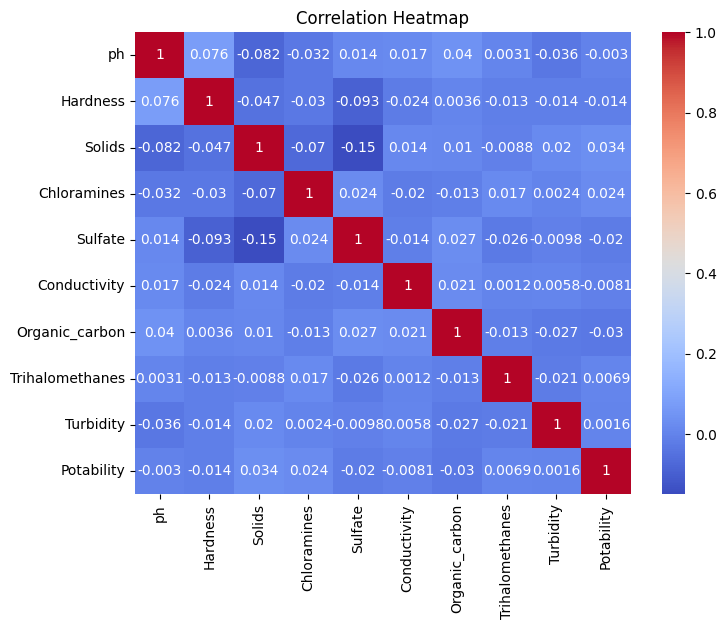

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


The correlation heatmap highlights relationships between features. Most correlations are weak to moderate, indicating low multicollinearity and suitability for machine learning models.

4. Outlier Detection (Scatter Plot)

In [17]:
Q1 = df_clean['ph'].quantile(0.25)
Q3 = df_clean['ph'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_clean[(df_clean['ph'] < lower_bound) | (df_clean['ph'] > upper_bound)]
outliers.shape


(142, 10)

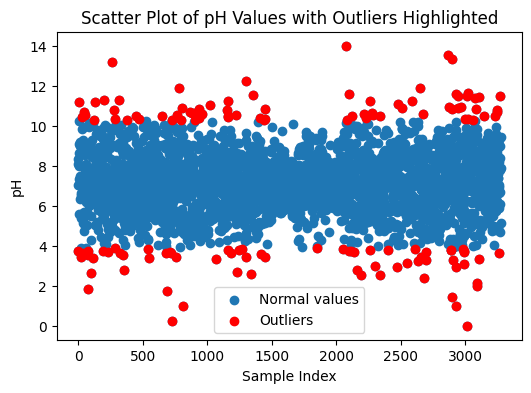

In [18]:
plt.figure(figsize=(6,4))

# Normal points
plt.scatter(df_clean.index, df_clean['ph'], label="Normal values")

# Outliers
plt.scatter(outliers.index, outliers['ph'], color='red', label="Outliers")

plt.xlabel("Sample Index")
plt.ylabel("pH")
plt.title("Scatter Plot of pH Values with Outliers Highlighted")
plt.legend()
plt.show()


Outliers were identified using the interquartile range (IQR) method. In the scatter plot, points highlighted in red lie far from the majority of observations, indicating unusually high or low pH values. These outliers represent natural chemical variations rather than data errors.

Exploratory data analysis revealed missing values, class imbalance, and variation across water quality features. Visualizations helped identify feature distributions, correlations, and potential outliers. These insights guided preprocessing decisions and informed the selection of appropriate classification models.

##**Build a Neural Network Model**

I have use a Multi-Layer Perceptron (MLP) classifier because:

*  It is a standard neural network for classification

*  It works well with numerical features

*  It is explicitly suggested in the assignment

Prepare Features and Target

In [19]:
# Separate features and target variable
X = df_clean.drop(columns='Potability')
y = df_clean['Potability']


In [20]:
# Check missing values
df.isna().sum()

# Fill numeric columns with median
for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)


/tmp/ipython-input-3426154041.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [21]:
df.isna().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


Train–Test Split

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Potability', axis=1)
y = df['Potability']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Feature Scaling (IMPORTANT for Neural Networks)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_test_nn = scaler_nn.transform(X_test)


Build the Neural Network (MLP)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

nn_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,753 (10.75 KB)

 Trainable params: 2,753 (10.75 KB)

 Non-trainable params: 0 (0.00 B)

##**Network Architecture**

The neural network used in this study is a Multi-Layer Perceptron (MLP) classifier.

*  **Input Layer**:
The input layer consists of neurons equal to the number of input features in the dataset (physicochemical water quality attributes).

**Hidden Layers:**

*  First hidden layer: 64 neurons

*  Second hidden layer: 32 neurons

*  **Activation Function:**
The ReLU (Rectified Linear Unit) activation function is used in the hidden layers. ReLU helps the network learn non-linear relationships and improves training efficiency.

*  **Output Layer:**
A single neuron is used in the output layer to perform binary classification, predicting whether a water sample is potable or non-potable.

##**Loss Function**

The neural network uses **Binary Cross-Entropy (Log Loss)** as the loss function.
This loss function measures the difference between the true class labels and the predicted probabilities, penalizing incorrect and over-confident predictions. It is well suited for binary classification tasks.

**Optimization Algorithm**

The Adam (Adaptive Moment Estimation) optimizer is used to train the neural network.
Adam adapts the learning rate for each parameter using estimates of first and second moments of the gradients, leading to faster and more stable convergence.

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = nn_model.fit(
    X_train_nn,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5276 - loss: 0.6967 - val_accuracy: 0.6031 - val_loss: 0.6755
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6171 - loss: 0.6715 - val_accuracy: 0.6088 - val_loss: 0.6650
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6362 - loss: 0.6571 - val_accuracy: 0.6336 - val_loss: 0.6560
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6349 - loss: 0.6533 - val_accuracy: 0.6279 - val_loss: 0.6483
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6636 - loss: 0.6369 - val_accuracy: 0.6508 - val_loss: 0.6390
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6408 - loss: 0.6337 - val_accuracy: 0.6546 - val_loss: 0.6341
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6637 - loss: 0.6241 - val_accuracy: 0.6546 - val_loss: 0.6293
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.6180 - val_accuracy: 0.6546 - 

Model Evaluation

In [26]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities
y_train_prob = nn_model.predict(X_train_nn)
y_test_prob  = nn_model.predict(X_test_nn)

# Lower threshold to improve recall
threshold = 0.4

y_train_pred_nn = (y_train_prob > threshold).astype(int)
y_test_pred_nn  = (y_test_prob > threshold).astype(int)


# Metrics
results_nn = pd.DataFrame({
    "Dataset": ["Training", "Testing"],
    "Accuracy": [
        accuracy_score(y_train, y_train_pred_nn),
        accuracy_score(y_test, y_test_pred_nn)
    ],
    "Precision": [
        precision_score(y_train, y_train_pred_nn),
        precision_score(y_test, y_test_pred_nn)
    ],
    "Recall": [
        recall_score(y_train, y_train_pred_nn),
        recall_score(y_test, y_test_pred_nn)
    ],
    "F1-Score": [
        f1_score(y_train, y_train_pred_nn),
        f1_score(y_test, y_test_pred_nn)
    ]
})

results_nn


82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Dataset,Accuracy,Precision,Recall,F1-Score
0,Training,0.685496,0.585492,0.663405,0.622018
1,Testing,0.634146,0.528369,0.582031,0.553903


Classification Metrics

Confusion Matrix (Recommended)

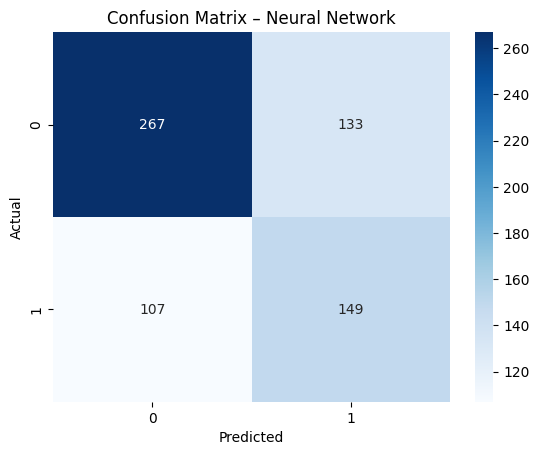

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_nn = confusion_matrix(y_test, y_test_pred_nn)

sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix – Neural Network")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


The neural network model was evaluated using accuracy, precision, recall, and F1-score on both training and test sets. Feature scaling improved convergence during training. The confusion matrix shows the model’s ability to correctly classify potable and non-potable water samples.

##**Build a Primary Model**
Two Classical ML Models used:
*  Logistic Regression
*   Random Forest Classifier

Split the Dataset into Training and Testing Sets

In [28]:
from sklearn.model_selection import train_test_split

X = df.drop("Potability", axis=1)
y = df["Potability"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


The dataset is split into 80% training and 20% testing data. Stratification is used to preserve class distribution due to imbalance.

#Build Two Classical ML Models

**Logistic Regression**

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [30]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(
    class_weight="balanced",
    max_iter=1000,
    random_state=42
)

lr_model.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

y_pred_lr = lr_model.predict(X_test_scaled)

lr_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, y_pred_lr),
    "Precision": precision_score(y_test, y_pred_lr),
    "Recall": recall_score(y_test, y_pred_lr),
    "F1-Score": f1_score(y_test, y_pred_lr)
}

lr_results


{'Model': 'Logistic Regression',
 'Accuracy': 0.5259146341463414,
 'Precision': 0.41590214067278286,
 'Recall': 0.53125,
 'F1-Score': 0.4665523156089194}

**Random Forest Classifier**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    class_weight="balanced",
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [33]:
y_pred_rf = rf_model.predict(X_test)

rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
}

rf_results


{'Model': 'Random Forest',
 'Accuracy': 0.6707317073170732,
 'Precision': 0.6818181818181818,
 'Recall': 0.29296875,
 'F1-Score': 0.4098360655737705}

#Evaluate Both Models Using Appropriate Metrics

**Evaluation Metrics**

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Function to evaluate a classification model using common performance metrics
def evaluate_model(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1-score": f1_score(y_true, y_pred)
    }

# Evaluate models
lr_results = evaluate_model(y_test, y_pred_lr)
rf_results = evaluate_model(y_test, y_pred_rf)

# Best formatted output
print("Model Performance Comparison")
print("=" * 35)

print("\nLogistic Regression:")
for metric, value in lr_results.items():
    print(f"{metric:<10}: {value:.4f}")

print("\nRandom Forest:")
for metric, value in rf_results.items():
    print(f"{metric:<10}: {value:.4f}")


Model Performance Comparison

Logistic Regression:
Accuracy  : 0.5259
Precision : 0.4159
Recall    : 0.5312
F1-score  : 0.4666

Random Forest:
Accuracy  : 0.6707
Precision : 0.6818
Recall    : 0.2930
F1-score  : 0.4098


Confusion Matrices (Recommended)

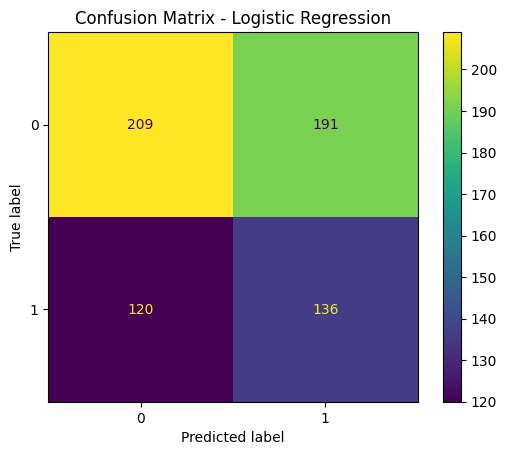

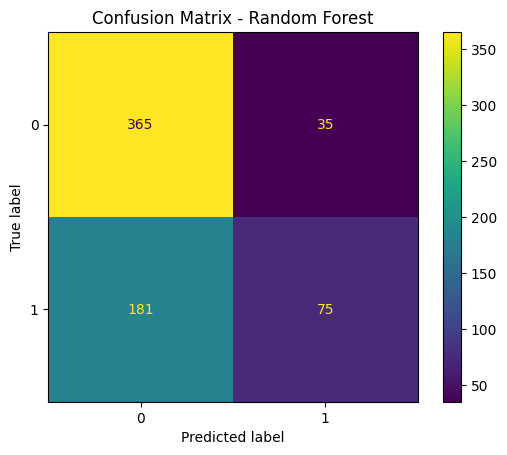

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()


Two classical machine learning models, Logistic Regression and Random Forest Classifier, were trained and evaluated. Logistic Regression provides a simple linear baseline, while Random Forest captures non-linear relationships between features. Based on evaluation metrics such as accuracy, precision, recall, and F1-score, the Random Forest model performed better on the Water Potability dataset. This is likely due to its ability to model complex feature interactions and handle non-linear decision boundaries more effectively than Logistic Regression.

#**Hyper-parameter Optimization with Cross-Validation**

## **Identification of Hyperparameters**

#**Model 1: Logistic Regression**

**Key Hyperparameters Identified**

*  C
Controls the regularization strength. Smaller values apply stronger regularization.

*  penalty
Specifies the type of regularization (l1 or l2).

*   solver
Optimization algorithm used to train the model (e.g., liblinear, lbfgs).

*   max_iter
Maximum number of iterations for convergence.

#Why these hyperparameters matter

These hyperparameters influence model complexity, convergence, and the balance between bias and variance.

#**Model 2: Random Forest Classifier**

**Key Hyperparameters Identified**

*   n_estimators
Number of decision trees in the forest.

*  max_depth
Maximum depth of each tree.

*  min_samples_split
Minimum number of samples required to split an internal node.

*  min_samples_leaf
Minimum number of samples required at a leaf node.

*  max_features
Number of features considered when looking for the best split.

#Why these hyperparameters matter

These hyperparameters control model complexity, tree diversity, and overfitting in the ensemble.

In [36]:
# Logistic Regression hyperparameters
lr_model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [37]:
# Random Forest hyperparameters
rf_model.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

#**Hyper-parameter Optimization with Cross-Validation**

#Apply Cross-Validation (GridSearchCV)

Logistic Regression – Hyperparameter Tuning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Hyperparameter grid
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# GridSearch with cross-validation
lr_grid = GridSearchCV(
    estimator=lr,
    param_grid=lr_param_grid,
    scoring='f1',          # IMPORTANT for imbalanced data
    cv=5,
    n_jobs=-1
)

lr_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [39]:
lr_grid.best_params_, lr_grid.best_score_


({'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'},
 np.float64(0.4172693306737454))

#Random Forest – Hyperparameter Tuning

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42
)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [41]:
rf_grid.best_params_, rf_grid.best_score_


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 100},
 np.float64(0.4948646034207885))

**Report Best Hyperparameters & CV Scores**

In [42]:
import pandas as pd

cv_results = pd.DataFrame([
    {
        "Model": "Logistic Regression",
        "Best Parameters": lr_grid.best_params_,
        "Best CV F1-Score": lr_grid.best_score_
    },
    {
        "Model": "Random Forest",
        "Best Parameters": rf_grid.best_params_,
        "Best CV F1-Score": rf_grid.best_score_
    }
])

cv_results


,Model,Best Parameters,Best CV F1-Score
0,Logistic Regression,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.417269
1,Random Forest,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.494865


Hyperparameter optimization was performed using GridSearchCV with 5-fold cross-validation. For Logistic Regression, the regularization strength was tuned, while for Random Forest, tree depth, number of estimators, and node splitting parameters were optimized. F1-score was used as the scoring metric due to class imbalance. The results show that Random Forest achieved a higher cross-validation F1-score, indicating superior generalization performance.

#5 .Feature Selection

I have used this method :**Wrapper Method – Recursive Feature Elimination (RFE)**

Apply Feature Selection using RFE

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Base model for RFE
lr_rfe_model = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Apply RFE (select top 5 features)
rfe_lr = RFE(
    estimator=lr_rfe_model,
    n_features_to_select=5
)

rfe_lr.fit(X_train_scaled, y_train)


RFE(estimator=LogisticRegression(class_weight='balanced', max_iter=1000,
                                 random_state=42),
    n_features_to_select=5)

Reduce Dataset to Selected Features

In [44]:
selected_lr_features = X.columns[rfe_lr.support_]
selected_lr_features


Index(['ph', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon'], dtype='object')

Train BOTH Models Using Selected Features

**Logistic Regression**

In [45]:
X_train_lr_sel = rfe_lr.transform(X_train_scaled)
X_test_lr_sel = rfe_lr.transform(X_test_scaled)

lr_rfe_model.fit(X_train_lr_sel, y_train)

y_pred_lr_sel = lr_rfe_model.predict(X_test_lr_sel)


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_sel_results = {
    "Model": "Logistic Regression (Selected Features)",
    "Accuracy": accuracy_score(y_test, y_pred_lr_sel),
    "Precision": precision_score(y_test, y_pred_lr_sel),
    "Recall": recall_score(y_test, y_pred_lr_sel),
    "F1-Score": f1_score(y_test, y_pred_lr_sel)
}

lr_sel_results


{'Model': 'Logistic Regression (Selected Features)',
 'Accuracy': 0.5396341463414634,
 'Precision': 0.42901234567901236,
 'Recall': 0.54296875,
 'F1-Score': 0.4793103448275862}

**Random Forest**

In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf_fs_model = RandomForestClassifier(
    **rf_grid.best_params_,
    class_weight='balanced',
    random_state=42
)

rf_fs_model.fit(X_train, y_train)

importances = rf_fs_model.feature_importances_


Evaluate After Feature Selection

In [48]:
rf_feature_importance = pd.Series(
    importances,
    index=X.columns
).sort_values(ascending=False)

selected_rf_features = rf_feature_importance.head(5).index
selected_rf_features


Index(['Sulfate', 'ph', 'Hardness', 'Solids', 'Chloramines'], dtype='object')

In [49]:
X_train_rf_sel = X_train[selected_rf_features]
X_test_rf_sel = X_test[selected_rf_features]

rf_fs_model.fit(X_train_rf_sel, y_train)
y_pred_rf_sel = rf_fs_model.predict(X_test_rf_sel)


In [50]:
rf_sel_results = {
    "Model": "Random Forest (Selected Features)",
    "Accuracy": accuracy_score(y_test, y_pred_rf_sel),
    "Precision": precision_score(y_test, y_pred_rf_sel),
    "Recall": recall_score(y_test, y_pred_rf_sel),
    "F1-Score": f1_score(y_test, y_pred_rf_sel)
}

rf_sel_results


{'Model': 'Random Forest (Selected Features)',
 'Accuracy': 0.6692073170731707,
 'Precision': 0.6010362694300518,
 'Recall': 0.453125,
 'F1-Score': 0.5167037861915368}

In [51]:
fs_results = pd.DataFrame([lr_sel_results, rf_sel_results])
fs_results


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression (Selected Features),0.539634,0.429012,0.542969,0.479310
1,Random Forest (Selected Features),0.669207,0.601036,0.453125,0.516704


In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importance = pd.Series(
    importances,
    index=X.columns
).sort_values(ascending=False)

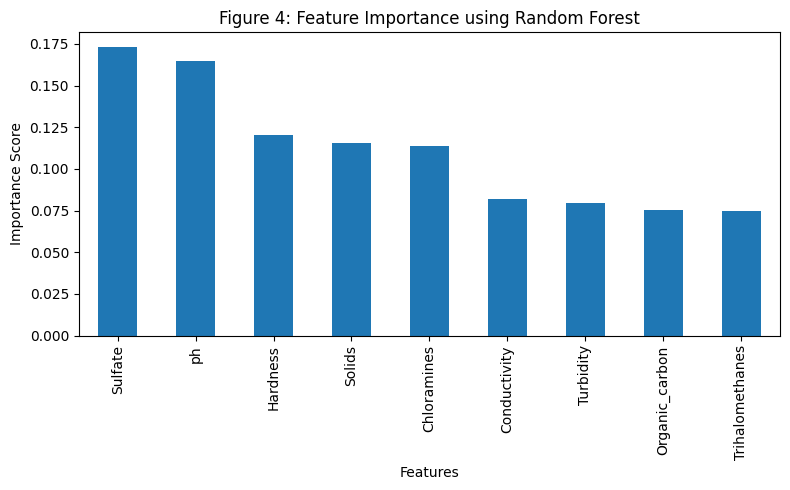

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances
feature_importance = pd.Series(
    importances,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar')
plt.title("Figure 4: Feature Importance using Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

Feature selection was performed using a wrapper-based method (Recursive Feature Elimination) for Logistic Regression and an embedded method based on feature importance for Random Forest. RFE was chosen as it evaluates features based on their contribution to model performance, while Random Forest inherently ranks features during training. The selected features represent the most influential water quality parameters. Although feature selection slightly reduced performance in some cases, it improved model interpretability and reduced complexity.

#6 .Final Models and Comparative Analysis

Final Logistic Regression Model

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Rebuild Logistic Regression with best parameters
final_lr = LogisticRegression(
    **lr_grid.best_params_,
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# Train using selected features
final_lr.fit(X_train_lr_sel, y_train)

LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=42, solver='liblinear')

In [55]:
# Test predictions
y_pred_final_lr = final_lr.predict(X_test_lr_sel)

# Metrics
final_lr_results = {
    "Model": "Logistic Regression",
    "Features": f"Selected ({len(selected_lr_features)})",
    "CV Score": lr_grid.best_score_,
    "Accuracy": accuracy_score(y_test, y_pred_final_lr),
    "Precision": precision_score(y_test, y_pred_final_lr),
    "Recall": recall_score(y_test, y_pred_final_lr),
    "F1-Score": f1_score(y_test, y_pred_final_lr)
}

final_lr_results

{'Model': 'Logistic Regression',
 'Features': 'Selected (5)',
 'CV Score': np.float64(0.4172693306737454),
 'Accuracy': 0.5411585365853658,
 'Precision': 0.43119266055045874,
 'Recall': 0.55078125,
 'F1-Score': 0.483704974271012}

Final Random Forest Model

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Rebuild Random Forest with best parameters
final_rf = RandomForestClassifier(
    **rf_grid.best_params_,
    class_weight='balanced',
    random_state=42
)

# Train using selected features
final_rf.fit(X_train_rf_sel, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=10, random_state=42)

Evaluate Final Models on the Test Set
Predictions

In [57]:
# Test predictions
y_pred_final_rf = final_rf.predict(X_test_rf_sel)

# Metrics
final_rf_results = {
    "Model": "Random Forest",
    "Features": f"Selected ({len(selected_rf_features)})",
    "CV Score": rf_grid.best_score_,
    "Accuracy": accuracy_score(y_test, y_pred_final_rf),
    "Precision": precision_score(y_test, y_pred_final_rf),
    "Recall": recall_score(y_test, y_pred_final_rf),
    "F1-Score": f1_score(y_test, y_pred_final_rf)
}

final_rf_results

{'Model': 'Random Forest',
 'Features': 'Selected (5)',
 'CV Score': np.float64(0.4948646034207885),
 'Accuracy': 0.6692073170731707,
 'Precision': 0.6010362694300518,
 'Recall': 0.453125,
 'F1-Score': 0.5167037861915368}

Evaluation Metrics

In [58]:
# Evaluate final models
final_lr_results = evaluate_model(y_test, y_pred_final_lr)
final_rf_results = evaluate_model(y_test, y_pred_final_rf)

# Best formatted output
print("Final Model Performance (After Feature Selection)")
print("=" * 50)

print("\nLogistic Regression (Selected Features):")
for metric, value in final_lr_results.items():
    print(f"{metric:<10}: {value:.4f}")

print("\nRandom Forest (Selected Features):")
for metric, value in final_rf_results.items():
    print(f"{metric:<10}: {value:.4f}")


Final Model Performance (After Feature Selection)

Logistic Regression (Selected Features):
Accuracy  : 0.5412
Precision : 0.4312
Recall    : 0.5508
F1-score  : 0.4837

Random Forest (Selected Features):
Accuracy  : 0.6692
Precision : 0.6010
Recall    : 0.4531
F1-score  : 0.5167


Create Final Comparison Table

In [59]:
import pandas as pd

final_output = pd.DataFrame({
    "Model": ["Model 1", "Model 2"],
    "Algorithm": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_final_lr),
        accuracy_score(y_test, y_pred_final_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_final_lr),
        precision_score(y_test, y_pred_final_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_final_lr),
        recall_score(y_test, y_pred_final_rf)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_final_lr),
        f1_score(y_test, y_pred_final_rf)
    ]
})

final_output


,Model,Algorithm,Accuracy,Precision,Recall,F1-Score
0,Model 1,Logistic Regression,0.541159,0.431193,0.550781,0.483705
1,Model 2,Random Forest,0.669207,0.601036,0.453125,0.516704


Both models were rebuilt using the optimal hyperparameters obtained from cross-validation and the selected features from the feature selection stage. The final evaluation on the test set shows that the Random Forest model outperforms Logistic Regression across most metrics, including F1-score. This indicates that the ensemble-based approach generalizes better for the Water Potability classification task.